<a href="https://colab.research.google.com/github/Faradezo/Coleta_e_Armazenamento/blob/main/Trilha6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lista de imports

In [1]:
#packages
!pip install unidecode

# Load EDA Pkgs
import pandas as pd

# Load ML Pkgs
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import string

     |████████████████████████████████| 235 kB 5.2 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [2]:
#Utilizando a base disponibilizada pelo professor
df_uol = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')

Escolhi o Reinaldo Azevedo por ser o unico da lista que ouço todo dia o programa e gosto de alguns pontos de vista

In [3]:
df_reinaldo = df_uol[df_uol['author'] == 'Reinaldo Azevedo']
df_reinaldo.sample() #amostra para checar se esta certo

,author,title,content
2784,Reinaldo Azevedo,Novo ministro indica que Bolsonaro ainda vê Me...,\nA escolha do novo ministro do Meio Ambiente...


In [4]:
#contagem de palavras de cada artigo
df_reinaldo['words'] = df_reinaldo['content'].str.split().str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Funcoes de limpeza

In [5]:
stop = stopwords.words('portuguese')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
stemmer = nltk.stem.RSLPStemmer()

In [6]:
# remoção de palavras de parada
df_reinaldo['content_treated'] = df_reinaldo['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remoção de pontuaçao
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remoção de numeros
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dc8331750>,
      dtype=object)

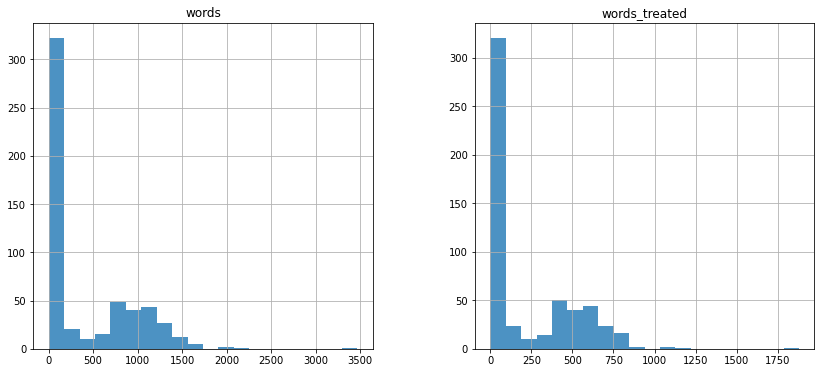

In [7]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_reinaldo['words_treated'] = df_reinaldo['content_treated'].str.split().str.len()
df_reinaldo.hist(bins=20, alpha=0.8, figsize=(14,6))

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
#Converte os textos numa matriz para contagem
#Reinaldo Azevedo
XRA = vectorizer.fit_transform(df_reinaldo['content_treated'])
vocabulary_reinaldo = vectorizer.get_feature_names()
pdXRA = pd.DataFrame(data=XRA.toarray(), columns=vocabulary_reinaldo) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
#lista das palavras
len(vocabulary_reinaldo)
df_XRA = pdXRA.T
df_XRA['total_ra'] = df_XRA.sum(axis=1) 
pdXRA

,abag,abaixo,abalroadas,abandona,abandonado,abandonar,abandono,abandonou,abarca,abastecimento,...,zero,zhengli,zients,zimerman,zona,zorra,zoser,zufelatto,zumbi,zuniga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Reinaldo Azevedo
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XRA = pdXRA.T

#Calcula a quantidade de vezes que cada palavra é utilizada
df_XRA['total_ra'] = df_XRA.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XRA.drop(df_XRA.columns[0:len(df_reinaldo['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_XRA = df_XRA.sort_values(by='total_ra', ascending=False)

#Gera a tabela
df_XRA.head(50)

,total_ra
bolsonaro,1373
presidente,1042
ser,719
ainda,509
ministro,459
governo,451
contra,451
supremo,445
caso,396
sobre,391


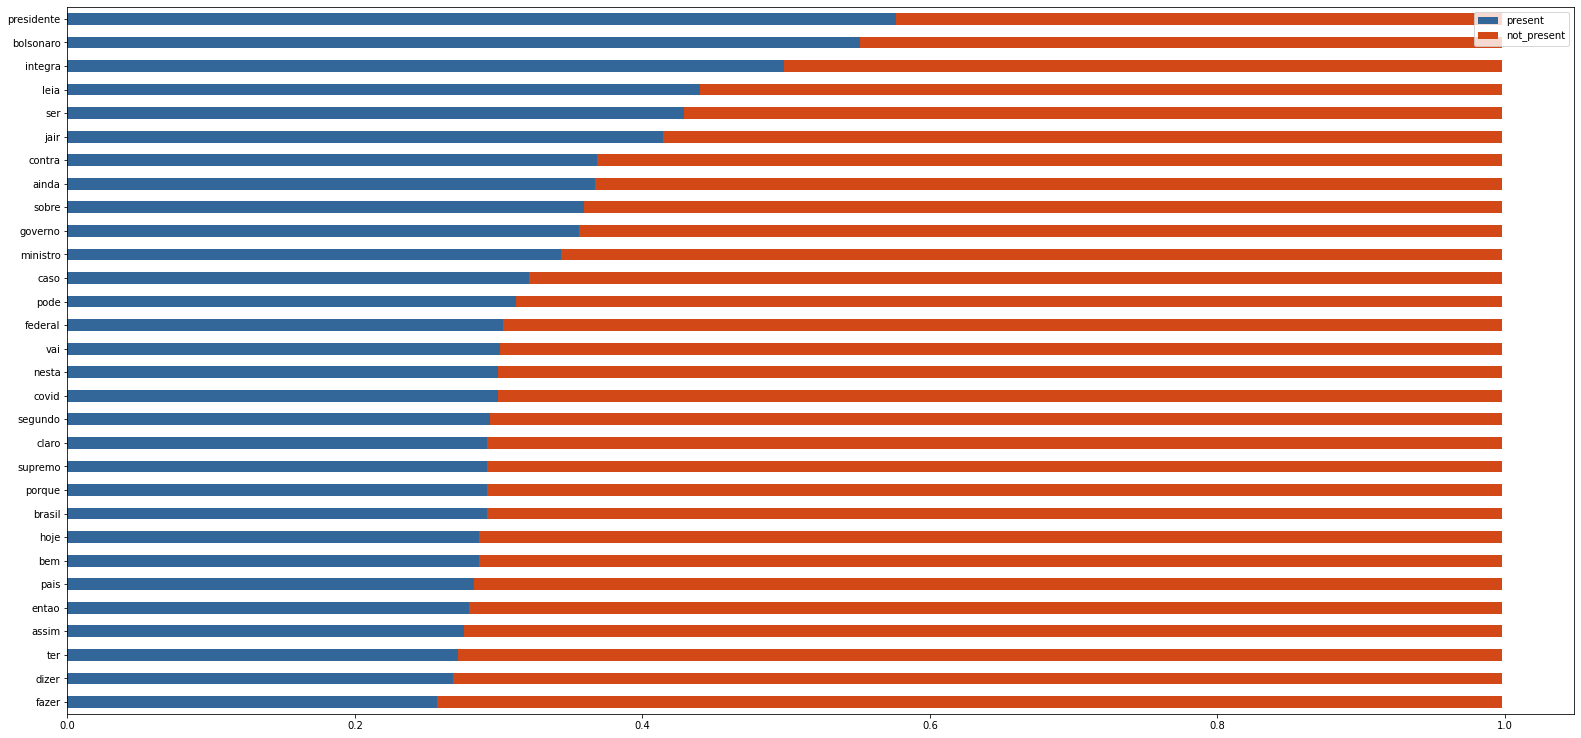

In [11]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXRAT = pdXRA.T

#Calcula a quantidade de documentos que aquela palavra entrou ou nao entrou
pdXRAT['present'] = (pdXRAT.ne(0).sum(axis=1) -1) / len(df_reinaldo['content'])
pdXRAT['not_present'] = pdXRAT.eq(0).sum(axis=1) / len(df_reinaldo['content'])

#REmove as colunas individuais de cada documento para gerar o grafico
pdXRAT.drop(pdXRAT.columns[0:len(df_reinaldo['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXRAT = pdXRAT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXRAT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [12]:
pdXRAT.tail(30)

,present,not_present
fazer,0.257299,0.740876
dizer,0.268248,0.729927
ter,0.271898,0.726277
assim,0.275547,0.722628
entao,0.279197,0.718978
pais,0.282847,0.715328
bem,0.286496,0.711679
hoje,0.286496,0.711679
brasil,0.291971,0.706204
porque,0.291971,0.706204


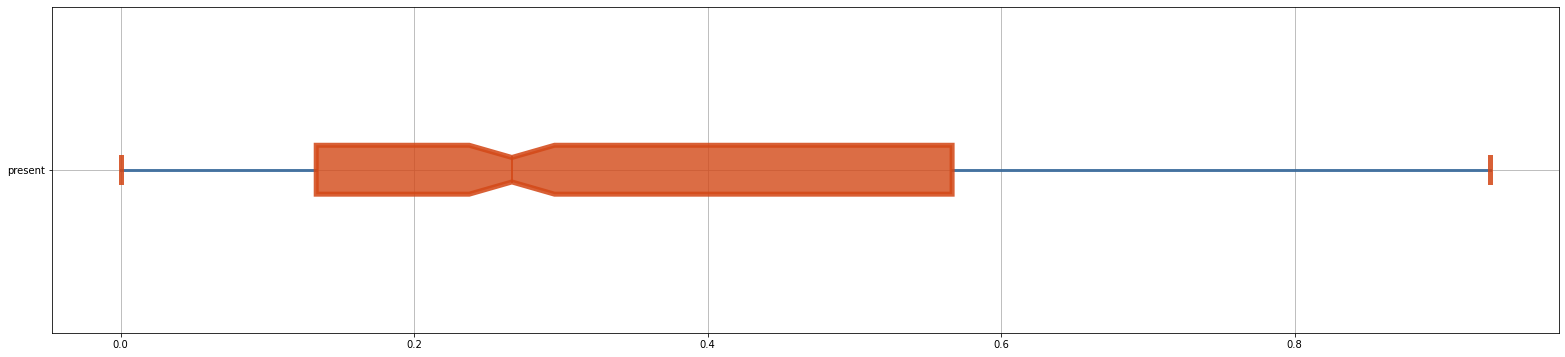

In [13]:
#Reinicia a matriz transposta
pdXRAT = pdXRA.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXRAT['present'] = (pdXRAT.ne(0).sum(axis=1) -1) / len(df_reinaldo['content'])
pdXRAT = pdXRAT.sort_values(by='present', ascending=False)
pdXRAT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXRAT.head(30).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXRAT = pdXRAT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXRAT['present'] = (pdXRAT.ne(0).sum(axis=1)) / 30

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXRAT.drop(pdXRAT.columns[0:30], axis=1, inplace=True)

#Gera o gráfico de boxplor 
pdXRAT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)
